In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

인터액티브 세션 시작하기:

In [2]:
sess = tf.InteractiveSession()

구글의 inception모델을 로딩하기

In [3]:
from libs import inception
net = inception.get_inception_model()

net에 들어가 있는 그래프를 디폴트로 사용하도록 알림.

In [4]:
tf.import_graph_def(net['graph_def'], name='inception')

그래프의 연산자들을 살펴보기

In [5]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]

그래프에의 입력을 살펴보기

In [6]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [7]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

다음은 그레디언트 벡터를 계산하는 연산자를 정의한 부분임

In [8]:
gradient = tf.gradients(tf.reduce_max(softmax, 1), x)

In [9]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

In [10]:
import os        # os에 관계된 라이브러리들을 import한다.  
dirname = 'temp'   # 디렉토리명(dirname)을 'temp'로 한다. 

# dirname이라는 디렉토리 안에 있는 모든 파일을 filenames에 저장한다. 
filenames = [os.path.join(dirname, fname)   # 밑에서 얻은 파일들을 [](배열)안에 추가 
             for fname in os.listdir(dirname)]   #dirname내의 모든 파일명을 얻는다.

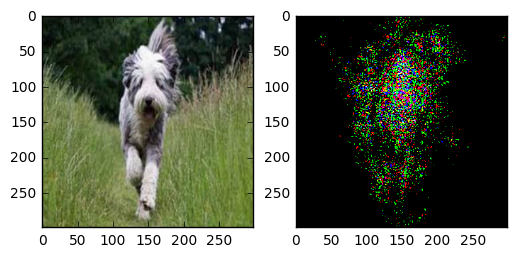

In [11]:
img = plt.imread(filenames[1])
img2 = inception.preprocess(img)
img_4d = img2[np.newaxis]
test_res =  sess.run(gradient, feed_dict={x: img_4d})
test_res2 = test_res[0]

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img2))
axs[1].imshow(np.abs(np.uint8(test_res2[0]*2000)))

In [12]:
test_result = np.squeeze(test_res2)
test_result2 = np.zeros((299,299))

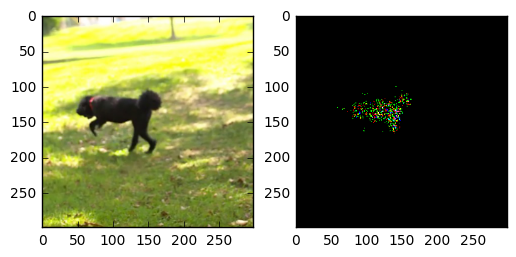

In [20]:
img = plt.imread(filenames[2])
img2 = inception.preprocess(img)
img_4d = img2[np.newaxis]
test_res =  sess.run(gradient, feed_dict={x: img_4d})
test_res2 = test_res[0]

fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img2))
axs[1].imshow(np.abs(np.uint8(test_res2[0]*200)))
